# Usando OpenCV

## Carregando a base de dados
- base de Yale: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import os
import zipfile
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
caminho = '/content/drive/MyDrive/estudo de visao computacional/Datasets/yalefaces.zip'
arquivo = zipfile.ZipFile(file=caminho, mode='r')
arquivo.extractall('./')
arquivo.close()

## Pré-processamento das imagens

In [ ]:
#trocar a extensão das imagens para conseguir treinar
caminho = '/content/yalefaces/train'
print(os.listdir(caminho))

['subject03.sleepy.gif', 'subject14.happy.gif', 'subject06.glasses.gif', 'subject02.wink.gif', 'subject01.sleepy.gif', 'subject05.happy.gif', 'subject13.leftlight.gif', 'subject07.rightlight.gif', 'subject03.sad.gif', 'subject02.sleepy.gif', 'subject03.rightlight.gif', 'subject04.rightlight.gif', 'subject13.happy.gif', 'subject08.leftlight.gif', 'subject10.leftlight.gif', 'subject08.sleepy.gif', 'subject13.glasses.gif', 'subject14.rightlight.gif', 'subject14.centerlight.gif', 'subject08.surprised.gif', 'subject07.surprised.gif', 'subject14.glasses.gif', 'subject12.sad.gif', 'subject06.sleepy.gif', 'subject01.rightlight.gif', 'subject01.surprised.gif', 'subject09.wink.gif', 'subject10.noglasses.gif', 'subject10.surprised.gif', 'subject03.happy.gif', 'subject08.noglasses.gif', 'subject01.glasses.gif', 'subject09.centerlight.gif', 'subject06.noglasses.gif', 'subject06.surprised.gif', 'subject05.wink.gif', 'subject04.normal.gif', 'subject06.centerlight.gif', 'subject08.centerlight.gif', 's

In [ ]:
def pegar_dados_imagem(caminho):
  caminhos = [os.path.join(caminho, f) for f in os.listdir(caminho)]
  faces = [] #pixeis da imagem
  ids = [] #numero das pessoas
  for foto in caminhos:
    imagem = Image.open(foto).convert('L') #deixando no formato da biblioteca PIL, e e escala de cinza
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(foto)[1].split('.')[0].replace('subject', '')) #pegando o numero da pessoa
    faces.append(imagem_np)
    ids.append(id)
  return np.array(ids), faces

In [ ]:
ids, faces = pegar_dados_imagem(caminho)

In [ ]:
ids

array([ 3, 14,  6,  2,  1,  5, 13,  7,  3,  2,  3,  4, 13,  8, 10,  8, 13,
       14, 14,  8,  7, 14, 12,  6,  1,  1,  9, 10, 10,  3,  8,  1,  9,  6,
        6,  5,  4,  6,  8,  9,  8,  3, 10,  2,  2,  9, 11, 15,  3,  5, 15,
        4,  1, 14,  7,  7, 11,  5, 12, 13,  7,  2, 13,  4, 10, 12,  4, 13,
        9, 15, 15, 14,  8, 10, 11, 15,  5,  5, 11, 11, 10,  9,  5,  4, 12,
        6,  2,  8,  9,  6, 10,  4, 15,  6, 11,  7, 11, 12,  7, 14, 12,  4,
        1,  1, 11, 12,  2, 11, 15, 10, 13,  2,  7,  3, 13,  3,  9,  6, 12,
       15, 13, 12,  5, 14,  8,  1,  4,  3, 14,  9,  5,  1,  2, 15,  7])

In [ ]:
len(ids)

135

In [ ]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[109,  95,  90, ..., 220, 230, 235],
        [237, 215, 210, ..., 244, 236, 239],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [187, 179, 183, ..., 235, 216, 225],
        [190, 183, 189, ..., 220, 200, 209],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[110, 114, 125, ..., 255, 255, 242],
        [238, 241, 255, ..., 255, 255, 249],
        [253, 25

In [ ]:
faces[0].shape #tamanhos da imagem

(243, 320)

## Treinando o classificador LBPH

In [ ]:
'''dentro do arquivo tem os parametros usados
padrão: precisão = 0,66666...
radius = 2, nei = 5, x, y = 5: precisão 0,6
radius = 3, nei = 12, x, y = 5: precisão 0,6
radius = 4, nei = 14, x, y = 9: precisão 0,7
'''
lbph = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors = 14, grid_x=9, grid_y=9)
lbph.train(faces, ids)
lbph.write('classificador_lbph.yml')

## Reconhecimento de faces

In [ ]:
classificador_face = cv2.face.LBPHFaceRecognizer_create()
classificador_face.read('/content/classificador_lbph.yml')

In [ ]:
imagem_teste = '/content/yalefaces/test/subject01.happy.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 249, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
previsao = classificador_face.predict(imagem_np)
previsao

(1, 63.26476332390736)

## Avaliação do classificador

In [ ]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))

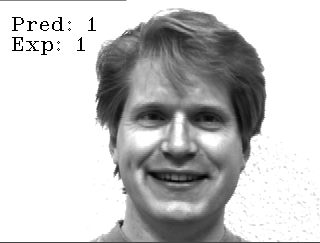

In [ ]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(imagem_np)

In [ ]:
caminhos = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for caminho in caminhos:
  imagem = Image.open(caminho).convert('L') #deixando no formato da biblioteca PIL
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = classificador_face.predict(imagem_np)
  saida_esperada = int(os.path.split(caminho)[1].split('.')[0].replace('subject', '')) #pegando o numero da pessoa
  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [ ]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [ ]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
previsoes

array([ 3,  4,  8,  4,  9,  1, 15,  9,  4,  4,  4, 11, 14, 12,  4,  5,  7,
       13, 13, 14,  7,  3, 12, 14, 11,  6, 10,  5, 12,  7])

In [ ]:
saidas_esperadas

array([ 3,  4,  8,  4,  7,  1, 15,  9,  2,  1, 10, 11, 14, 12,  8,  5, 15,
       13, 13, 14,  7,  3,  2,  6, 11,  6, 10,  5, 12,  9])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

<Axes: >

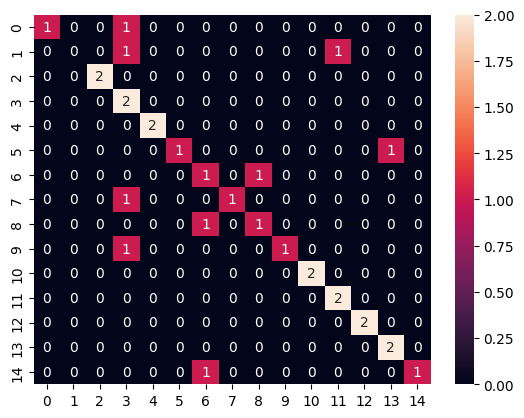

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(saidas_esperadas, previsoes)
sns.heatmap(cm, annot=True)

# Dlib

In [ ]:
import dlib

## Detecção de pontos faciais

In [ ]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos_faciais = dlib.shape_predictor('/content/drive/MyDrive/estudo de visao computacional/Weights/shape_predictor_68_face_landmarks.dat')

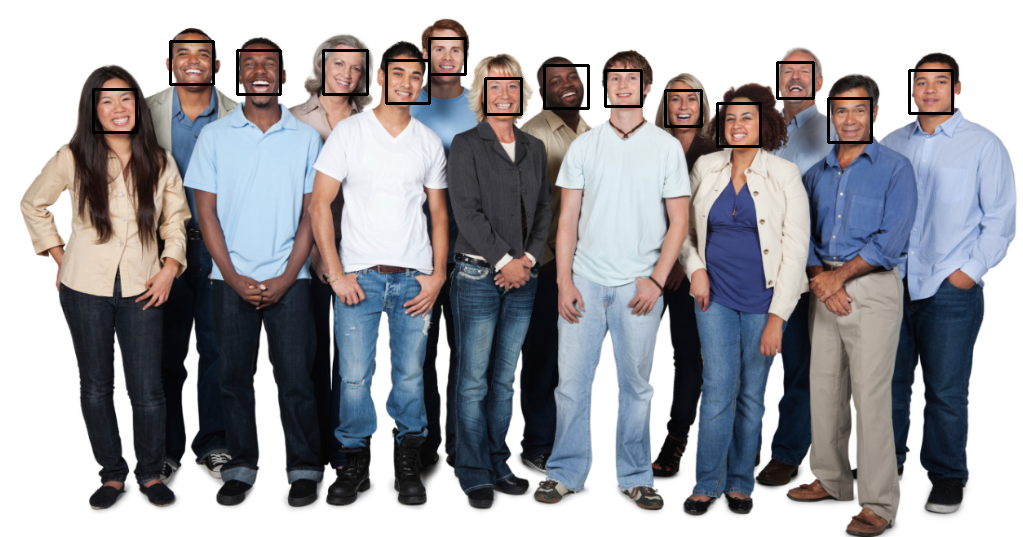

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/estudo de visao computacional/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem,(l,t), (r,b), (0,0,0), 2)
cv2_imshow(imagem)

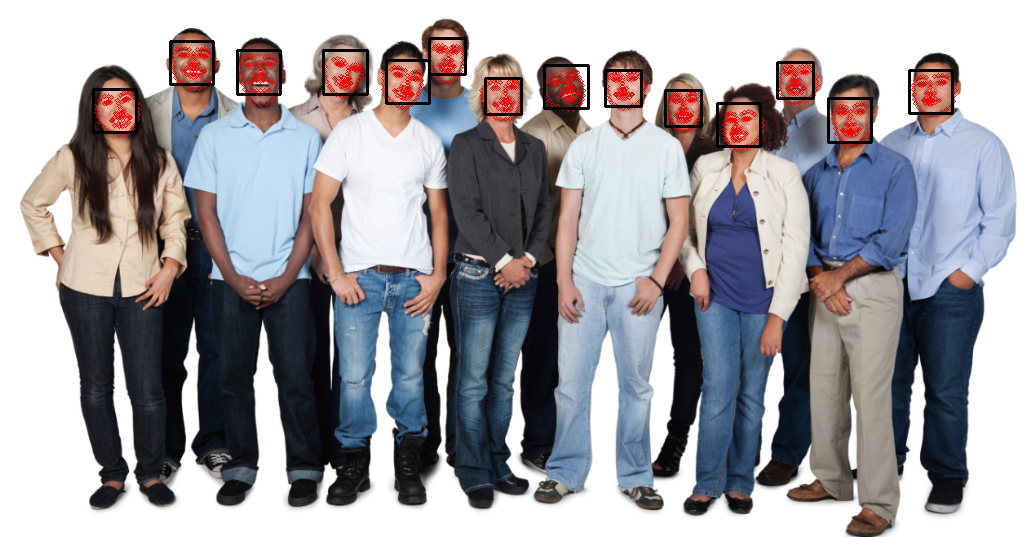

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/estudo de visao computacional/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos_faciais(imagem, face)
  #print(len(pontos.parts())) cada face são extraidos 68 pontos
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,0,255))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem,(l,t), (r,b), (0,0,0), 2)
cv2_imshow(imagem)

## Detecção dos descritores faciais

In [37]:
#é importado uma CNN para detectar o rosto
#resnet: https://arvix.org/abs/1512.03385
descritor_facial = dlib.face_recognition_model_v1('/content/drive/MyDrive/estudo de visao computacional/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [44]:
index = {}
idx = 0
descricoes = None

caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for caminho in caminhos:
  imagem = Image.open(caminho).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np,(l,t), (r,b), (0,0,0), 2)

    pontos = detector_pontos_faciais(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,0,255))

    descritores_faciais = descritor_facial.compute_face_descriptor(imagem_np, pontos) #ele vem em vetor do dlib com 128 valores
    descritores_faciais = [f for f in descritores_faciais] #transformando em lista
    descritores_faciais = np.array(descritores_faciais, dtype=np.float64) #transformando em array
    descritores_faciais = descritores_faciais[np.newaxis, :]

    if descricoes is None:
      descricoes = descritores_faciais
    else:
      descricoes= np.concatenate((descricoes, descritores_faciais), axis=0)
    index[idx] = caminho
    idx+=1


In [40]:
descricoes.shape

(132, 128)

In [47]:
index

{0: '/content/yalefaces/train/subject03.sleepy.gif',
 1: '/content/yalefaces/train/subject14.happy.gif',
 2: '/content/yalefaces/train/subject06.glasses.gif',
 3: '/content/yalefaces/train/subject02.wink.gif',
 4: '/content/yalefaces/train/subject01.sleepy.gif',
 5: '/content/yalefaces/train/subject05.happy.gif',
 6: '/content/yalefaces/train/subject13.leftlight.gif',
 7: '/content/yalefaces/train/subject07.rightlight.gif',
 8: '/content/yalefaces/train/subject03.sad.gif',
 9: '/content/yalefaces/train/subject02.sleepy.gif',
 10: '/content/yalefaces/train/subject03.rightlight.gif',
 11: '/content/yalefaces/train/subject04.rightlight.gif',
 12: '/content/yalefaces/train/subject13.happy.gif',
 13: '/content/yalefaces/train/subject08.leftlight.gif',
 14: '/content/yalefaces/train/subject10.leftlight.gif',
 15: '/content/yalefaces/train/subject08.sleepy.gif',
 16: '/content/yalefaces/train/subject13.glasses.gif',
 17: '/content/yalefaces/train/subject14.rightlight.gif',
 18: '/content/yale

In [45]:
len(index)

132

## Calculo da distancia entre os descritores faciais das pessoas
- é por meio desse calculo que conseguimos identificar o rosto da pessoa

In [46]:
#identificando semelhanças entre descritores faciais
np.linalg.norm(descricoes[131] - descricoes[131])
#aqui percebemos que, quanto menor o valor, mais parecido as faces são

0.0

In [48]:
np.linalg.norm(descricoes[131] - descricoes[130])

0.6404640902479888

In [51]:
#agora vamos comparar uma unica face com todas as outras que temos
np.linalg.norm(descricoes[0] - descricoes, axis = 1)

array([0.        , 0.67497253, 0.67357083, 0.68082633, 0.61888044,
       0.69629137, 0.64680409, 0.85054926, 0.40884808, 0.67670903,
       0.40650144, 0.72571971, 0.56156784, 0.49420488, 0.77846121,
       0.52870288, 0.57593873, 0.73802569, 0.68778211, 0.53345266,
       0.77622097, 0.63322677, 0.66521951, 0.66581105, 0.71759155,
       0.55973166, 0.67461699, 0.73057372, 0.28035181, 0.54807521,
       0.6918859 , 0.61335403, 0.67355336, 0.67647903, 0.66710998,
       0.66488025, 0.67194743, 0.55235021, 0.58914512, 0.52245242,
       0.47761013, 0.65358009, 0.74833982, 0.69825369, 0.67765326,
       0.68026378, 0.57751082, 0.3411156 , 0.63976862, 0.51822959,
       0.67258492, 0.62344463, 0.74473518, 0.73455512, 0.72653527,
       0.7228986 , 0.65841159, 0.67506229, 0.55918277, 0.81968805,
       0.73169519, 0.56609765, 0.6738295 , 0.68705495, 0.67843278,
       0.71447386, 0.64026524, 0.57342546, 0.56037269, 0.5981395 ,
       0.62061803, 0.53824407, 0.67321435, 0.86684631, 0.52262

In [52]:
#vendo qual o menor valor possivel de uma face, sem ser ela mesma
np.argmin(np.linalg.norm(descricoes[0] - descricoes[1:], axis = 1))

27

In [55]:
np.linalg.norm(descricoes[0] - descricoes[1:], axis = 1)[27]

0.28035180689510186

## Detecção de faces

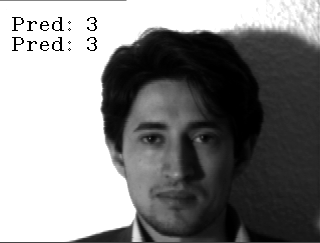

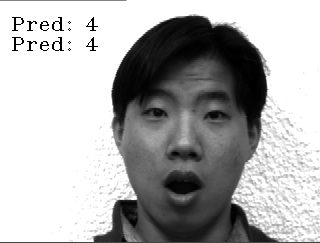

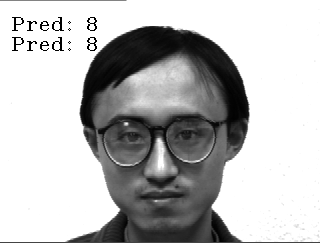

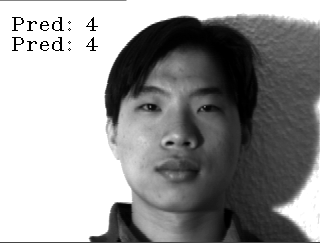

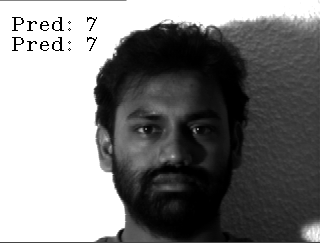

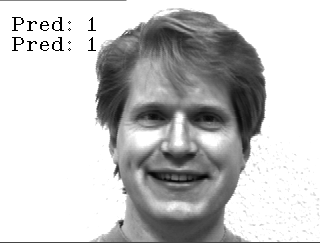

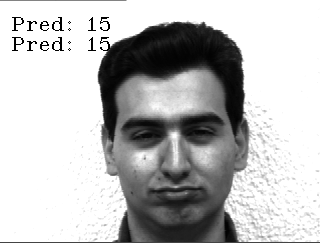

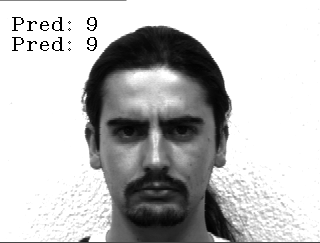

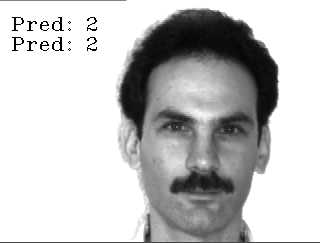

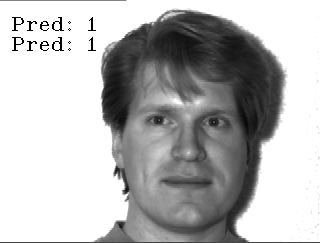

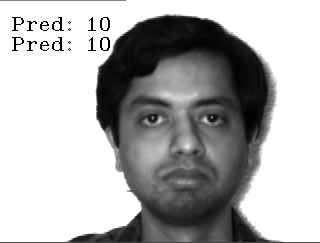

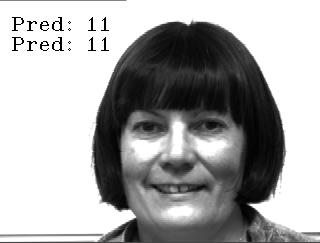

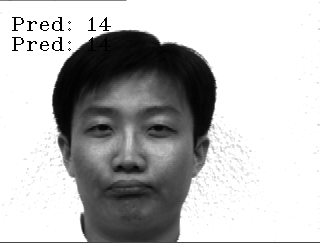

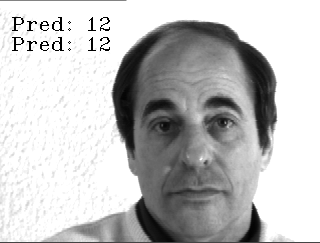

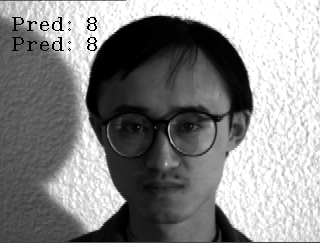

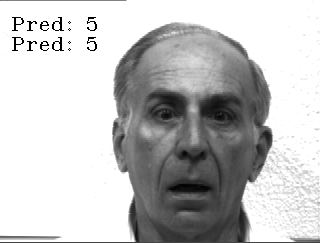

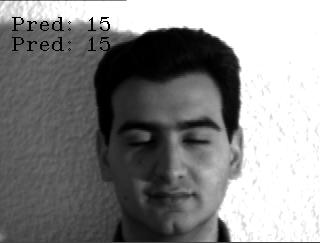

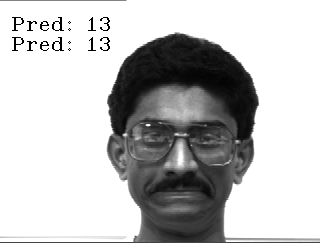

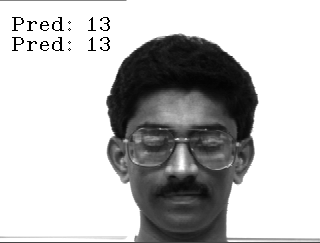

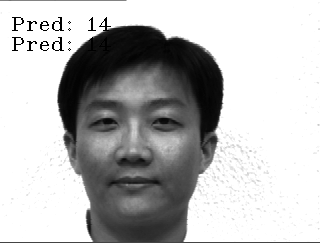

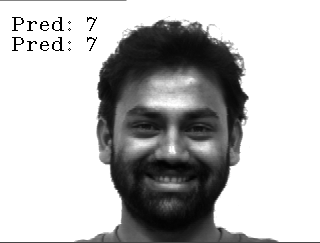

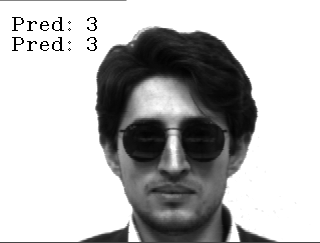

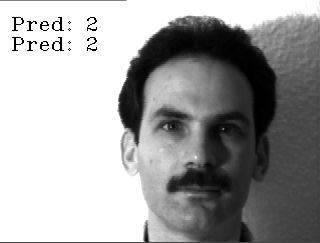

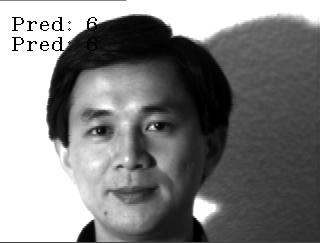

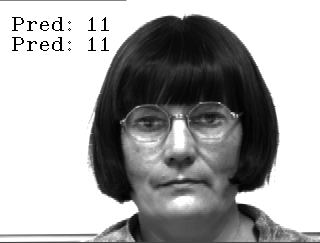

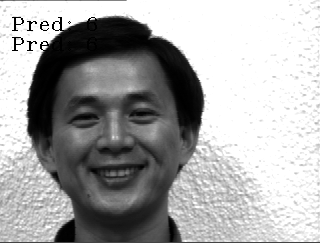

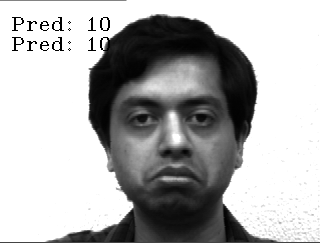

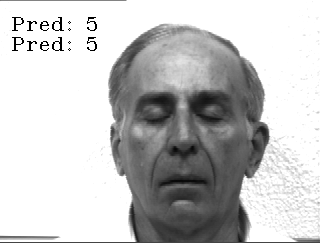

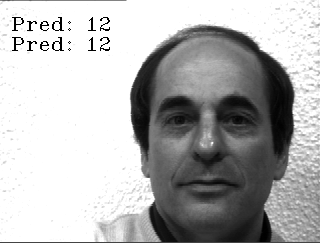

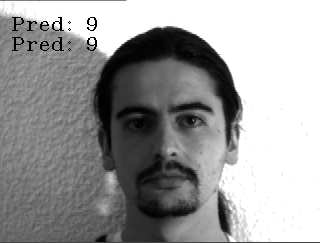

In [57]:
confianca = 0.5
caminhos = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for caminho in caminhos:
  imagem = Image.open(caminho).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    pontos = detector_pontos_faciais(imagem_np, face)
    descritores_faciais = descritor_facial.compute_face_descriptor(imagem_np, pontos)
    descritores_faciais = [f for f in descritores_faciais] #transformando em lista
    descritores_faciais = np.array(descritores_faciais, dtype=np.float64) #transformando em array
    descritores_faciais = descritores_faciais[np.newaxis, :]

    distancias = np.linalg.norm(descritores_faciais - descricoes, axis=1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      saida_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject', ''))
    else:
      saida_previsao = 'face não identificada'

    saida_esperada = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))

    cv2.putText(imagem_np, 'Pred: ' + str(saida_previsao), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0))
    cv2.putText(imagem_np, 'Pred: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0))
  cv2_imshow(imagem_np)

# Atividade